<a href="https://colab.research.google.com/github/Paolo20224/ProjectZero/blob/main/Proyecto_1_Parte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/sales_predictions.csv"
df = pd.read_csv(filename)

In [5]:
# A continuacion revisaremos aquellos datos nulos para ver la integridad de la informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Revisaremos los primero diez datos para dimensionar la magnitud de la info
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [7]:

# Revisaremos la estadistica descriptiva
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# A continuacion revisaremos la columna Item_Weight, donde entendemos que existe un peso unico para cada producto, por lo que la informacion nula, puede ser reemplazada en bada a la columna Item_Identifier
df2=df.groupby(['Item_Identifier'])[['Item_Weight']].mean()
df2

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [9]:
# A traves se un simple ejemplo podemos visualizar que para un mismo codigo existe un unico peso, sin embargo varios tamaños, por lo que solo sera posible gestionar (reemplazar) la variable peso y tener que lidiar con los datos nulos que aparecen en la comuna tamaño, de igual forma no considero que esta ultima tenga un peso tan relevante en termino de decisiones.
df4=df
itemfilter= df4["Item_Identifier"]== "FDP10"
df4=df4.loc[itemfilter,:]
df4

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [10]:
df3=df
byweight = df3.sort_values("Item_Weight")
byweight.head(10)
# A continuacion podemos corroborar que para cada codigo existe un unico peso, por lo que podemos asignar un peso para los valores nulos, en la medida que su p

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7808,FDP40,4.555,Regular,0.034329,Frozen Foods,110.1544,OUT013,1987,High,Tier 3,Supermarket Type1,1230.3984
4430,FDP40,4.555,Regular,0.034357,Frozen Foods,112.6544,OUT046,1997,Small,Tier 1,Supermarket Type1,2684.5056
3489,FDP40,4.555,Regular,0.034351,Frozen Foods,112.7544,OUT035,2004,Small,Tier 2,Supermarket Type1,1789.6704
4400,FDP40,4.555,Regular,0.034411,Frozen Foods,111.3544,OUT049,1999,Medium,Tier 1,Supermarket Type1,1342.2528
3077,DRE12,4.590,Low Fat,0.070767,Soft Drinks,111.9860,OUT035,2004,Small,Tier 2,Supermarket Type1,792.3020
7984,DRE12,4.590,Low Fat,0.000000,Soft Drinks,111.1860,OUT045,2002,NaN,Tier 2,Supermarket Type1,1245.0460
6432,DRE12,4.590,Low Fat,0.070722,Soft Drinks,113.2860,OUT013,1987,High,Tier 3,Supermarket Type1,1471.4180
1515,DRE12,4.590,Low Fat,0.070781,Soft Drinks,114.5860,OUT046,1997,Small,Tier 1,Supermarket Type1,1245.0460
1082,DRE12,4.590,Low Fat,0.070891,Soft Drinks,111.6860,OUT049,1999,Medium,Tier 1,Supermarket Type1,1584.6040
5493,DRF23,4.610,Low Fat,0.000000,Hard Drinks,173.8396,OUT046,1997,Small,Tier 1,Supermarket Type1,1221.0772


In [11]:
# A traves de la siguiente funcion logramos reemplazar todos los valores nulos asociados a las columna peso, para todos los Items que ya tenian un peso asignado. 
df5=df
def Upgrade_Item_Identifier_mean(Item_Identifier):
  Item_Identifier_filter  = df5['Item_Identifier'] == Item_Identifier
  values_mean = df5[Item_Identifier_filter]['Item_Weight'].mean()
  return values_mean


Item_Weight_filter_isna = df5['Item_Weight'].isna()

df5.loc[Item_Weight_filter_isna , 'Item_Weight'] = df5.apply(lambda x:Upgrade_Item_Identifier_mean( x['Item_Identifier']) ,axis=1 )
df5[Item_Weight_filter_isna]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,5.000,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,17.250,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,19.100,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [12]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
#A continuacion revisaremos el archivo en excel para validar que elementos conducentes a error puede contener esta base.
df5.to_excel("prediccionventas.xlsx", index=False)

In [14]:
# A continuacion realizaremos algunos cambios adicionales a nuestra base
df5["Item_Fat_Content"] = df5["Item_Fat_Content"].replace("LF","Low Fat")
df5["Item_Fat_Content"] = df5["Item_Fat_Content"].replace("reg","Regular")
df5["Item_Fat_Content"] = df5["Item_Fat_Content"].replace("low fat","Low Fat")
df5.groupby(['Item_Fat_Content'])[['Item_Fat_Content']].count()

,Item_Fat_Content
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [15]:
import pandas as pd

corr_df = df5.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025975,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.013426,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013168,-0.128625,0.567574,-0.049135,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

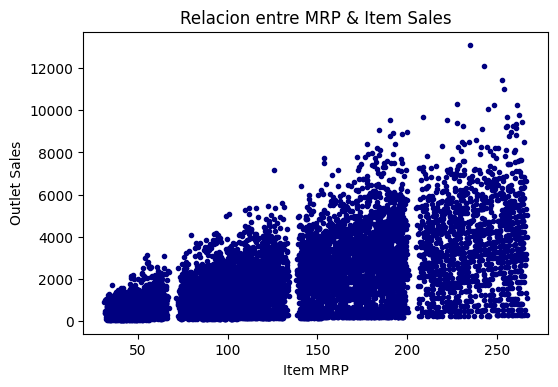

In [17]:
df6=df5

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(dpi=100)

x= df6["Item_MRP"]
y= df6["Item_Outlet_Sales"]

plt.scatter(x,y,c="navy", marker=".")
plt.xlabel("Item MRP")
plt.ylabel("Outlet Sales")
plt.title("Relacion entre MRP & Item Sales")

plt.show

In [21]:
df6.groupby(["Item_Type"])["Item_Outlet_Sales"].sum()/1000

Item_Type
Baking Goods             1265.525342
Breads                    553.237189
Breakfast                 232.298952
Canned                   1444.151493
Dairy                    1522.594051
Frozen Foods             1825.734789
Fruits and Vegetables    2820.059817
Hard Drinks               457.793427
Health and Hygiene       1045.200138
Household                2055.493713
Meat                      917.565612
Others                    325.517610
Seafood                   148.868219
Snack Foods              2732.786087
Soft Drinks               892.897722
Starchy Foods             351.401250
Name: Item_Outlet_Sales, dtype: float64

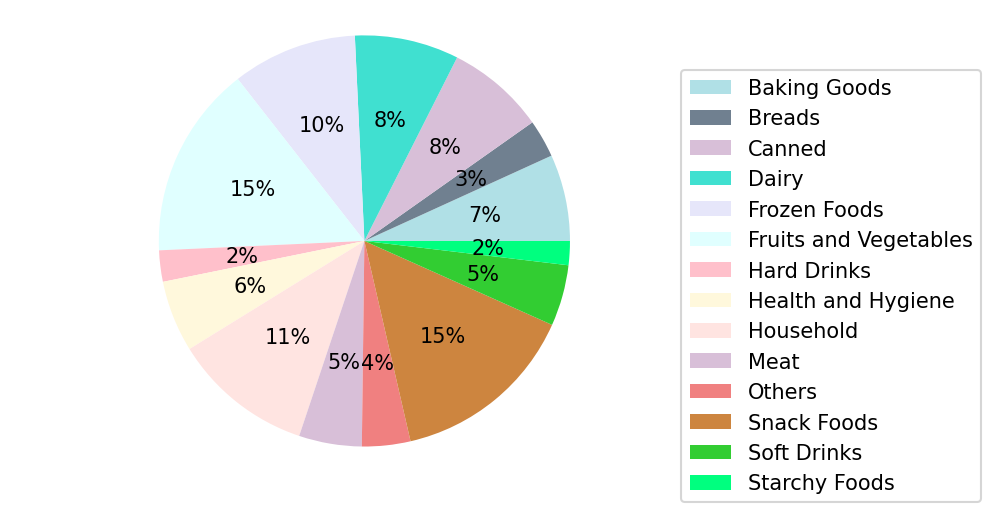

In [48]:
import matplotlib.pyplot as plt

fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,1,1) 

size = [1266,553,1444,1522,1825,2820,457,1045,2055,918,707,2733,893,351]
etiquetas = ["Baking Goods","Breads","Canned","Dairy","Frozen Foods","Fruits and Vegetables","Hard Drinks","Health and Hygiene","Household","Meat","Others","Snack Foods","Soft Drinks","Starchy Foods"]
colores=["powderblue","slategrey","thistle","turquoise","lavender","lightcyan","pink","cornsilk","mistyrose","thistle","lightcoral","peru","limegreen","springgreen"]

ax1.pie(size, autopct="%.0f%%", shadow = False, startangle=0, colors=colores)
ax1.legend(bbox_to_anchor=(1.4, 0.9), loc='upper right', labels= etiquetas)

ax1.axis("equal")

plt.show()